In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRFRegressor

In [3]:
df = pd.read_excel('training_data.xlsx')

In [221]:
cols = df.isnull().mean()*100
pd.DataFrame(cols)

,0
ID,0.000000
Severity,0.000000
Ventilation,0.000000
Mean Age,46.947368
% Male,9.473684
...,...
Unnamed: 86,97.263158
Unnamed: 87,97.684211
Unnamed: 88,98.315789
Unnamed: 89,96.842105


In [40]:
main = []
for i in range(len(cols)):
    if cols[i] < 40:
        main.append(cols.index[i])

In [41]:
main

['ID',
 'Severity',
 'Ventilation',
 '% Male',
 'Hypertension',
 'Diabetes',
 'Cardiovascular Disease (incl. CAD)',
 'Fever (temperature ≥37·3°C)',
 'Cough',
 'Lymphocyte Count (10^9/L) - Median',
 'Mortality']

In [43]:
df_final = df[main]

In [50]:
df_final.isnull().mean()*100

ID                                     0.000000
Severity                               3.578947
Ventilation                           36.631579
% Male                                 9.473684
Hypertension                          34.947368
Diabetes                              31.578947
Cardiovascular Disease (incl. CAD)    37.894737
Fever (temperature ≥37·3°C)           25.052632
Cough                                 28.421053
Lymphocyte Count (10^9/L) - Median    39.157895
Mortality                              0.000000
dtype: float64

In [51]:
X = df_final.drop(['Mortality','ID'], axis = 1)

In [52]:
y = df_final['Mortality']

In [55]:
X.fillna(X.mean(), inplace=True)

In [54]:
df_final.head()

,ID,Severity,Ventilation,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median,Mortality
0,1,All,Both,0.6230,0.3000,0.1900,0.0800,0.9400,0.7900,1.0,0.28
1,1,Severe/Critical Only,Both,0.7037,0.4815,0.3148,0.2407,0.9444,0.7222,0.6,1
2,1,All,Both,0.5912,0.2336,0.1387,0.0146,0.9416,0.8175,1.1,0
3,2,All,Both,0.6030,NaN,0.1160,NaN,0.9150,NaN,0.9,0.16
4,2,All,Both,0.6160,NaN,0.1010,NaN,0.8990,NaN,0.8,0.15


In [56]:
X.head()

,Severity,Ventilation,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median
0,All,Both,0.6230,0.300000,0.1900,0.08000,0.9400,0.790000,1.0
1,Severe/Critical Only,Both,0.7037,0.481500,0.3148,0.24070,0.9444,0.722200,0.6
2,All,Both,0.5912,0.233600,0.1387,0.01460,0.9416,0.817500,1.1
3,All,Both,0.6030,0.286662,0.1160,0.14218,0.9150,0.603716,0.9
4,All,Both,0.6160,0.286662,0.1010,0.14218,0.8990,0.603716,0.8


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Severity                            458 non-null    object 
 1   Ventilation                         301 non-null    object 
 2   % Male                              475 non-null    float64
 3   Hypertension                        475 non-null    float64
 4   Diabetes                            475 non-null    float64
 5   Cardiovascular Disease (incl. CAD)  475 non-null    float64
 6   Fever (temperature ≥37·3°C)         475 non-null    float64
 7   Cough                               475 non-null    float64
 8   Lymphocyte Count (10^9/L) - Median  475 non-null    float64
dtypes: float64(7), object(2)
memory usage: 33.5+ KB


In [71]:
X['Severity'].value_counts()

All                     228
Severe/Critical Only    144
Mild only                91
Both                      5
Mild                      2
Severe                    2
Severe/critical only      2
Asymptomatic only         1
Name: Severity, dtype: int64

In [77]:
X['Severity'].fillna('All', inplace=True)

In [72]:
X['Ventilation'].value_counts()

Both                    371
Non-ventilation only     66
Ventilation only         19
Yes                      12
ΝΑ                        4
No                        3
Name: Ventilation, dtype: int64

In [75]:
X['Ventilation'].fillna('Both', inplace=True)

In [161]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Severity                            475 non-null    float64
 1   Ventilation                         475 non-null    float64
 2   % Male                              475 non-null    float64
 3   Hypertension                        475 non-null    float64
 4   Diabetes                            475 non-null    float64
 5   Cardiovascular Disease (incl. CAD)  475 non-null    float64
 6   Fever (temperature ≥37·3°C)         475 non-null    float64
 7   Cough                               475 non-null    float64
 8   Lymphocyte Count (10^9/L) - Median  475 non-null    float64
dtypes: float64(9)
memory usage: 33.5 KB


In [160]:
X.describe()

,Severity,Ventilation,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,2.671579,0.547368,0.547413,0.286662,0.147790,0.142180,0.706176,0.603716,1.587924
std,2.692687,1.113481,0.250783,0.232322,0.166772,0.189872,0.257966,0.241778,2.588316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
25%,0.000000,0.000000,0.462250,0.143000,0.060500,0.031500,0.672000,0.529000,0.900000
50%,4.000000,0.000000,0.547413,0.286662,0.147790,0.142180,0.706176,0.603716,1.580000
75%,6.000000,0.000000,0.659500,0.286662,0.147790,0.142180,0.881000,0.730000,1.587924
max,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.600000


In [79]:
from sklearn.preprocessing import LabelEncoder
X['Severity'] = LabelEncoder().fit_transform(X['Severity'])
X['Ventilation'] = LabelEncoder().fit_transform(X['Ventilation'])


In [105]:
X['Severity'] = np.array(X['Severity'],dtype =float)
X['Ventilation'] = np.array(X['Ventilation'],dtype =float)

In [106]:
X.head()

,Severity,Ventilation,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median
0,0.0,0.0,0.6230,0.300000,0.1900,0.08000,0.9400,0.790000,1.0
1,6.0,0.0,0.7037,0.481500,0.3148,0.24070,0.9444,0.722200,0.6
2,0.0,0.0,0.5912,0.233600,0.1387,0.01460,0.9416,0.817500,1.1
3,0.0,0.0,0.6030,0.286662,0.1160,0.14218,0.9150,0.603716,0.9
4,0.0,0.0,0.6160,0.286662,0.1010,0.14218,0.8990,0.603716,0.8


In [107]:
X.corr().round(2)

,Severity,Ventilation,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median
Severity,1.00,0.26,0.08,0.20,0.14,0.12,0.10,0.06,-0.00
Ventilation,0.26,1.00,0.05,-0.09,-0.18,-0.03,0.07,0.08,0.05
% Male,0.08,0.05,1.00,0.12,-0.15,0.07,0.08,0.06,0.16
Hypertension,0.20,-0.09,0.12,1.00,0.27,0.37,0.09,-0.00,-0.15
Diabetes,0.14,-0.18,-0.15,0.27,1.00,0.17,-0.00,-0.02,-0.13
Cardiovascular Disease (incl. CAD),0.12,-0.03,0.07,0.37,0.17,1.00,0.00,-0.01,-0.08
Fever (temperature ≥37·3°C),0.10,0.07,0.08,0.09,-0.00,0.00,1.00,0.48,0.04
Cough,0.06,0.08,0.06,-0.00,-0.02,-0.01,0.48,1.00,-0.02
Lymphocyte Count (10^9/L) - Median,-0.00,0.05,0.16,-0.15,-0.13,-0.08,0.04,-0.02,1.00


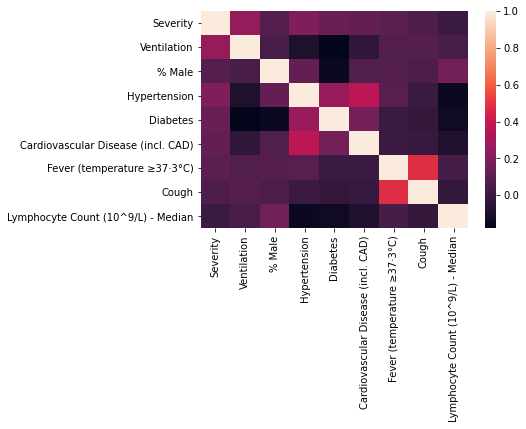

In [108]:
import seaborn as sns
sns.heatmap(X.corr().round(2))

In [163]:
for i in range(len(y)):
    if y[i] == 'na':
        y[i] = 0

C:\Users\chuda\anaconda3\envs\Rushabh\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chuda\anaconda3\envs\Rushabh\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [109]:
import statsmodels.api as sm

In [165]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler().fit_transform(X)

In [176]:
lr = sm.OLS(y.astype(float),X.astype(float))
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Mortality   R-squared (uncentered):                   0.513
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              54.65
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                    2.10e-67
Time:                        20:18:35   Log-Likelihood:                         -34.624
No. Observations:                 475   AIC:                                      87.25
Df Residuals:                     466   BIC:                                      124.7
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Severity                               0.0364      0.005      7.512      0.000       0.027       0.046
Ventilation                           -0.0559      0.012     -4.828      0.000      -0.079      -0.033
% Male                                -0.0634      0.045     -1.413      0.158      -0.152       0.025
Hypertension                           0.3136      0.059      5.296      0.000       0.197       0.430
Diabetes                               0.2427      0.076      3.184      0.002       0.093       0.392
Cardiovascular Disease (incl. CAD)     0.3207      0.069      4.677      0.000       0.186       0.455
Fever (temperature ≥37·3°C)            0.0259      0.050      0.518      0.605      -0.072       0.124
Cough                                 -0.0360      0.054     -0.669      0.504      -0.142       0.070
Lymphocyte Count (10^9/L) - Median    -0.0054      0.005     -1.132      0.258      -0.015       0.004
==============================================================================
Omnibus:                       74.395   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.463
Skew:                           1.050   Prob(JB):                     2.80e-24
Kurtosis:                       4.036   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
X2 = X.drop(['Lymphocyte Count (10^9/L) - Median','Cough','Fever (temperature ≥37·3°C)','% Male'], axis = 1)

In [166]:
from sklearn.model_selection import train_test_split

In [223]:
x_train,x_test,y_train,y_test = train_test_split(X2,y,test_size = 0.25,random_state = 42)

In [224]:
from sklearn.linear_model import LinearRegression

In [225]:
lrr = LinearRegression().fit(x_train,y_train)

In [226]:
lr_pred = lrr.predict(x_test)

In [227]:
from sklearn import metrics

In [228]:
np.sqrt(metrics.mean_squared_error(y_test,lr_pred))

0.2966348282794131

In [229]:
#########

In [230]:
def cross_sc(model):
    score = cross_val_score(model, x_train,y_train,cv = 10, scoring='r2')
    print('R2_Mean: ', np.mean(score))
    print('STD: ', np.std(score))

In [231]:
def rand_cv(model,X_train,y_train,param_grid):
    rand = RandomizedSearchCV(estimator=model,param_distributions=param_grid,scoring='r2',n_iter=20,verbose=1,cv=5, n_jobs=-1)
    rand_result = rand.fit(X_train, y_train)
    print('Best Score: ', rand_result.best_score_)
    print('Best Params: ', rand_result.best_params_)

In [232]:
def grid_cv(model,X_train,y_train,param_grid):
    grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring='r2',verbose=1,cv=5, n_jobs=-1)
    grid_result = grid.fit(X_train, y_train)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)

In [233]:
def scr(Model,x_test = x_test):
    y2 = Model.predict(x_test)
    rmse = np.sqrt(np.mean((y_test-y2)**2))
    em = (1-rmse/100000)*100
    Model = Model
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y2))
    MSE = (metrics.mean_squared_error(y_test,y2))
    r2 = metrics.r2_score(y_test,y2)
    MAE = metrics.mean_absolute_error(y_test,y2)
    Dataset = pd.DataFrame(data = [[Model, RMSE, MSE, r2, MAE,em]], columns = ['Model','RMSE','MSE', 'r2', 'MAE','Evaluation_Metric'])
    return Dataset

In [234]:
scr(lrr,x_test)

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,LinearRegression(),0.296635,0.087992,0.167624,0.227621,99.999703


In [235]:
lr_pred[:10].round(2)

array([0.47, 0.23, 0.06, 0.27, 0.14, 0.  , 0.22, 0.11, 0.11, 0.34])

In [236]:
y_test[:10]

375    0.29
422     0.2
9      0.07
73        0
354       0
33     0.01
78        0
441    0.56
117       1
90      0.2
Name: Mortality, dtype: object

In [237]:
lasso = Lasso()
la = lasso.fit(x_train,y_train)
cross_sc(lasso)

R2_Mean:  -0.027821584507288378
STD:  0.03304932702158314


In [238]:
scr(lasso)


,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,Lasso(),0.326847,0.106829,-0.010566,0.246493,99.999673


In [239]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
param_grid

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [240]:
grid_cv(lasso,x_train,y_train,param_grid)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.36451486621969165
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.2s finished


In [241]:
rand_cv(lasso,x_train,y_train, param_grid)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.36451486621969165
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [242]:
lasso = Lasso(alpha=0.001)#0.1
la = lasso.fit(x_train,y_train)
cross_sc(lasso)

R2_Mean:  0.34864859251810987
STD:  0.10664756347103486


In [243]:
y_pred_lasso = lasso.predict(x_test)
Lassos = scr(lasso)
Lassos

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,Lasso(alpha=0.001),0.295814,0.087506,0.172222,0.226814,99.999704


In [244]:
ridge = Ridge()
ridge.fit(x_train,y_train)
cross_sc(ridge)

R2_Mean:  0.3513324340516578
STD:  0.10656059663581048


In [245]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
param_grid

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [246]:
grid_cv(ridge,x_train,y_train,param_grid)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.3668929584078406
Best Params:  {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [247]:
rand_cv(ridge,x_train,y_train,param_grid)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    0.1s remaining:    0.0s


Best Score:  0.3668929584078406
Best Params:  {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [248]:
ridge = Ridge(alpha=10)#0.001
ridge.fit(x_train,y_train)
cross_sc(ridge)

R2_Mean:  0.3393608037365352
STD:  0.09558326674953756


In [249]:
Ridges = scr(ridge)
Ridges

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,Ridge(alpha=10),0.294263,0.086591,0.180883,0.226643,99.999706


In [250]:
elastic = ElasticNet()
el = elastic.fit(x_train,y_train)
cross_sc(el)

R2_Mean:  -0.027821584507288378
STD:  0.03304932702158314


In [251]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
param_grid = dict(alpha=alpha, l1_ratio = l1_ratio)
param_grid

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [252]:
grid_cv(elastic,x_train,y_train,param_grid)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:    1.0s


Best Score:  0.36552645029905695
Best Params:  {'alpha': 0.001, 'l1_ratio': 0.1}


[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    1.3s finished


In [253]:
rand_cv(elastic,x_train,y_train,param_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.3649113098299804
Best Params:  {'l1_ratio': 0.7, 'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [254]:
elastic = ElasticNet(alpha=0.001, l1_ratio=0.1) #0.01 1
el = elastic.fit(x_train,y_train)
cross_sc(el)

R2_Mean:  0.34946092339426027
STD:  0.10746128659812568


In [255]:
Elastic = scr(elastic)
Elastic

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,"ElasticNet(alpha=0.001, l1_ratio=0.1)",0.296266,0.087773,0.169695,0.227249,99.999704


In [256]:
from sklearn.ensemble import VotingRegressor

In [257]:
vot = VotingRegressor(estimators = [('Linear_regression',lrr),('Lasso_regression',lasso),('Ridge_regression',ridge),('Elastic_regression',elastic)]).fit(x_train,y_train)

In [258]:
cross_sc(vot)

R2_Mean:  0.35113596762142957
STD:  0.10435238819395798


In [259]:
vott = scr(vot)
vott

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,VotingRegressor(estimators=[('Linear_regressio...,0.295162,0.087121,0.175869,0.226502,99.999705


In [297]:
dt = DecisionTreeRegressor(random_state=42).fit(x_train,y_train)
cross_sc(dt)

R2_Mean:  0.2684865910330862
STD:  0.26772297687660007


In [298]:
scr(dt)

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,DecisionTreeRegressor(random_state=42),0.310616,0.096482,0.087312,0.194939,99.999689


In [261]:
param_grid = {'criterion':['mse','friedman_mse','mae'],
              'splitter':['best','random'],
              'max_depth':[1,2,3,4,5],
              'min_samples_split':[1,2,3,4,5],
              'min_samples_leaf':[1,2,3,4,5],
              'max_features':[1,2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10]}

In [262]:
rand_cv(dt,x_train,y_train,param_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.27200348729544566
Best Params:  {'splitter': 'random', 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_leaf_nodes': 6, 'max_features': 3, 'max_depth': 3, 'criterion': 'mse'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [265]:
dt = DecisionTreeRegressor(splitter='random', min_samples_split=3, min_samples_leaf= 4,
                           max_leaf_nodes= 6, max_features= 3, max_depth= 3, criterion= 'mse', random_state = 42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features=3, max_leaf_nodes=6,
                      min_samples_leaf=4, min_samples_split=3, random_state=42,
                      splitter='random')

In [266]:
cross_sc(dt)

R2_Mean:  0.13894613015684934
STD:  0.2306825820078805


In [267]:
dt_data = scr(dt)
dt_data

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,"DecisionTreeRegressor(max_depth=3, max_feature...",0.28844,0.083198,0.21298,0.211138,99.999712


In [268]:
from sklearn.ensemble import RandomForestRegressor

In [294]:
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [295]:
cross_sc(forest)

R2_Mean:  0.49580007350209465
STD:  0.11916598487361263


In [296]:
scr(forest)

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,"(DecisionTreeRegressor(max_features='auto', ra...",0.267568,0.071592,0.32276,0.179456,99.999732


In [271]:
param_grid = {'criterion':['mse','mae'],
              'max_depth':[1,2,3,4,5],
              'min_samples_split':[1,2,3,4,5],
              'min_samples_leaf':[1,2,3,4,5],
              'max_features':[1,2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10]}

In [272]:
rand_cv(forest,x_train,y_train,param_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


Best Score:  0.3588129305023838
Best Params:  {'min_samples_split': 4, 'min_samples_leaf': 5, 'max_leaf_nodes': 3, 'max_features': 3, 'max_depth': 4, 'criterion': 'mse'}


In [273]:
forest = RandomForestRegressor(min_samples_split=4,min_samples_leaf=5,max_leaf_nodes=3, max_features=3, 
                              max_depth=4, criterion='mse')

In [274]:
cross_sc(forest)

R2_Mean:  0.3499637362056787
STD:  0.09806339522932975


In [277]:
forest.fit(x_train,y_train)
rf_data = scr(forest)
rf_data

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,"(DecisionTreeRegressor(max_features='auto', ra...",0.268188,0.071925,0.319614,0.180814,99.999732


In [292]:
ada = AdaBoostRegressor().fit(x_train,y_train)
cross_sc(ada)


R2_Mean:  0.3657148823146223
STD:  0.174555006466688


In [293]:
scr(ada)

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.274298,0.075239,0.288261,0.198733,99.999726


In [279]:
param_grid = {'n_estimators':[100,200,300,400,500,600,700],
              'learning_rate':[1,0.1,0.01,0.001,0.0001],
              'loss':['linear']}

In [280]:
rand_cv(ada,x_train,y_train,param_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.7s finished


Best Score:  0.4564365070001336
Best Params:  {'n_estimators': 200, 'loss': 'linear', 'learning_rate': 0.01}


In [281]:
ada = AdaBoostRegressor(n_estimators=200,loss='linear', learning_rate=0.01)
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=200)

In [282]:
cross_sc(ada)

R2_Mean:  0.4301239928943879
STD:  0.09999654769067998


In [283]:
ad_data = scr(ada)
ad_data

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.278833,0.077748,0.264532,0.206984,99.999721


In [284]:
from xgboost import XGBRegressor

In [285]:
xgb = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.09,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
cross_sc(xgb)

[02:04:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [286]:
xgb.fit(x_train,y_train)

[02:04:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, learning_rate=0.09, min_child_weight=1.5,
             n_estimators=10000, reg_alpha=0.75, reg_lambda=0.45, seed=42,
             subsample=0.6)

In [287]:
xgb_data = scr(xgb)
xgb_data

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,"XGBRegressor(colsample_bytree=0.4, learning_ra...",0.261232,0.068242,0.354452,0.183226,99.999739


In [288]:
xgb_n = XGBRegressor().fit(x_train,y_train)

[02:06:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [289]:
xgbn_data = scr(xgb_n)
xgbn_data

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,XGBRegressor(),0.25626,0.065669,0.378792,0.178874,99.999744


In [299]:
new_vot = VotingRegressor(estimators = [('Adaboost',ada),('Random_Forest',forest),('XGBoost',xgb_n)]).fit(x_train,y_train)

[02:12:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [300]:
scr(new_vot)

,Model,RMSE,MSE,r2,MAE,Evaluation_Metric
0,"VotingRegressor(estimators=[('Adaboost', AdaBo...",0.258761,0.066957,0.366606,0.190997,99.999741


In [304]:
xgb_n.predict(x_test)[:10].round(2)

array([0.79, 0.11, 0.11, 0.06, 0.11, 0.  , 0.2 , 0.09, 0.09, 0.23],
      dtype=float32)

In [303]:
y_test[:10]

375    0.29
422     0.2
9      0.07
73        0
354       0
33     0.01
78        0
441    0.56
117       1
90      0.2
Name: Mortality, dtype: object